In [1]:
from pyseat.SEAT import SEAT
import pandas as pd
from sklearn.neighbors import kneighbors_graph
from pyseat.HierachicalEmbedding import HierachicalEmbedding
from numpy import *
import seaborn as sns
from sklearn import datasets
import os
from matplotlib import pyplot as plt

C:\Users\jqluo6\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def get_files(indirs, file_type): # {'tcr2ept','tcr2ag','tcr2org', 'tcr2tcr'}
    all_files=[]
    for indir in indirs:
        all_files += sorted([indir+'/'+x for x in os.listdir(indir) if x.count(file_type)>0])
    return all_files

def parse_infile(infile, keyword, match='total'):
    complete_match = []
    df = pd.read_csv(infile,sep='\t',low_memory=False,skiprows=4)
    cm = df[df.columns[1]].tolist()
    #print(cm)
    pm = df[df.columns[2]].tolist()
    CM = {x[:x.rfind(' (')]:float(x[x.rfind('(')+1:x.rfind(',')]) for x in cm if x!='-'}
    PM = {x[:x.rfind(' (')]:float(x[x.rfind('(')+1:x.rfind(',')]) for x in pm if x!='-'}
    frac = 0
    for each in list(CM.keys()):
        if keyword in each:
            frac+=CM[each]
    if match=='CM':
        return frac
    for each in list(PM.keys()):
        if keyword in each:
            frac+=PM[each]      
    return frac
    
def parse_infile_multi_keywords(infile,keywords, match='total'):
    frac = empty(len(keywords))
    for i,key in enumerate(keywords):
        frac[i] = parse_infile(infile, key, match)
    return frac

def get_frac_multi_keywords(indir,med,high,orgs,ags):
    fraction = []
    all_files = get_files(indir, 'tcr2org')
    #print(len(all_files),all_files[0])
    for i,infile in enumerate(all_files):
        ag_file = infile.replace('tcr2org','tcr2ag')
        frac = parse_infile_multi_keywords(infile, orgs)
        frac2 = parse_infile_multi_keywords(ag_file, ags)
        med_frac = med[i]
        high_frac = high[i]
        #eff_frac = med[i]+high[i]
        fraction.append(list(frac)+list(frac2)+[med_frac,high_frac])
    return array(fraction)
    
def make_feat_df(indirs,label,med,high,orgs,ags,cols):
    df = pd.DataFrame(get_frac_multi_keywords(indirs,med,high,orgs,ags),columns=cols)
    df['Group']=label
    return df

In [ ]:
melanoma = load('melanoma_sorted.npz')
lc = load('lung_cancer_sorted.npz')
cancer = load('other_cancer_sorted.npz')
uc = load('urothelial_cancer_sorted.npz')
bc = load('breast_cancer_sorted.npz')
ctrl = load('pre_vac_sorted.npz')
cmv_pos = load('CMV_pos_sorted.npz')
cmv_neg = load('CMV_neg_sorted.npz')
sle = load('SLE_sorted.npz')

In [4]:
orgs = ['SARS-CoV2','CMV','Influenza','EBV','Homo sapiens','HBV','YFV']
ags = ['MLANA','ABCD3','IGF2BP2','IE1','pp65','M->Influenza','NP->Influenza','polymerase->HBV','precore/core protein->HBV']
cols = orgs+ags+['Med','High']

melanoma_dir = 'melanoma_1e-4_tcranno_output'
lc_dir = 'lung_cancer_1e-4_tcranno_output'
bc_dir = 'breast_cancer_1e-4_tcranno_output'
uc_dir = 'urothelial_cancer_1e-4_tcranno_output'
other_dir = 'cancer_1e-4_tcranno_output'
cmv_pd = 'CMV_786_1e-4_tcranno_output/CMV_pos'
cmv_nd = 'CMV_786_1e-4_tcranno_output/CMV_neg'
ctrl_dir = 'covid_vaccine_1e-4_tcranno_output/pre-vaccination'
sle_dir = 'SLE_1e-4_tcranno_output'

cmvp_df = make_feat_df([cmv_pd],'CMV+',cmv_pos['med'],cmv_pos['high'],orgs,ags,cols)
cmvn_df = make_feat_df([cmv_nd],'CMV-',cmv_neg['med'],cmv_neg['high'],orgs,ags,cols)
sle_df = make_feat_df([sle_dir],'SLE',sle['med'],sle['high'],orgs,ags,cols)
mela_df = make_feat_df([melanoma_dir],'Melanoma',melanoma['med'],melanoma['high'],orgs,ags,cols)
lc_df = make_feat_df([lc_dir],'Lung',lc['med'],lc['high'],orgs,ags,cols)
bc_df = make_feat_df([bc_dir],'Breast',bc['med'],bc['high'],orgs,ags,cols)
uc_df = make_feat_df([uc_dir],'Urothelial',uc['med'],uc['high'],orgs,ags,cols)
cancer_df = make_feat_df([other_dir],'Others',cancer['med'],cancer['high'],orgs,ags,cols)
ctrl_df = make_feat_df([ctrl_dir],'Control',ctrl['med'],ctrl['high'],orgs,ags,cols)
healthy_df = make_feat_df([cmv_pd,cmv_nd],'Healthy',list(cmv_pos['med'])+list(cmv_neg['med']),list(cmv_pos['high'])+list(cmv_neg['high']),orgs,ags,cols)

fit bottom_up
sigma 0.5
i 1156 (linkage - initial non zero pair)
----- SE merge phase 0 True start, individuals:  420 , leaves  420
1576
----- SE merge phase 0 end, individuals 0 , leaves  57
i 3578 merge phase
i 3635 merge phase update leaves states
----- SE merge phase 1 True start, individuals:  57 , leaves  57
26
----- SE merge phase 1 end, individuals 35 , leaves  45
i 3649 merge phase
----- SE merge phase 2 False start, individuals:  35 , leaves  45
1
----- SE merge phase 2 end, individuals 35 , leaves  45
i 3649 merge phase
----- SE binary merge 3
i 3652 binary_combine
----- SE binary merge 4
i 5501 binary_combine
N 420 i 5501
build tree time 0.3295283317565918
se cost
[       nan 8.67778838 8.49232872 8.48352372 8.15573898 8.15580382
 8.15664948 8.15792786 8.14384467 8.15391632 8.16047965]
8.1438446691296
spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=371955.6875	loss_1=1123161.5	loss_2=1448605.125	loss=2943722.5	update_loss=2943722.5	

C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


epoch=49	loss_0=44435.0703125	loss_1=241722.59375	loss_2=377982.9375	loss=664140.625	update_loss=664140.625	


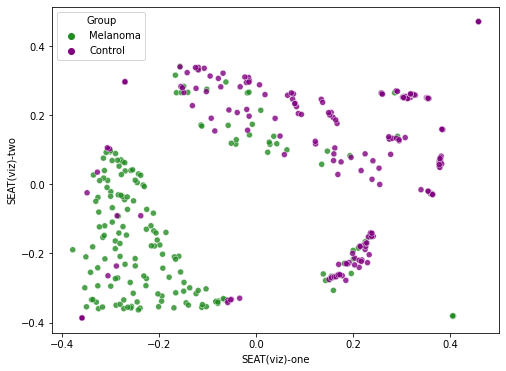

In [5]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([mela_df,ctrl_df])
seat = SEAT(affinity="gaussian_kernel",kernel_gamma=0.5,sparsification="knn_neighbors",n_neighbors=5,objective="SE",strategy="bottom_up",
            verbose=True)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=50, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/melanoma.feat7.png',dpi=300)

spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=332145.75	loss_1=1235850.625	loss_2=1467548.625	loss=3035545.0	update_loss=3035545.0	


C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


epoch=99	loss_0=24039.78515625	loss_1=177125.765625	loss_2=257501.734375	loss=458667.28125	update_loss=458667.28125	


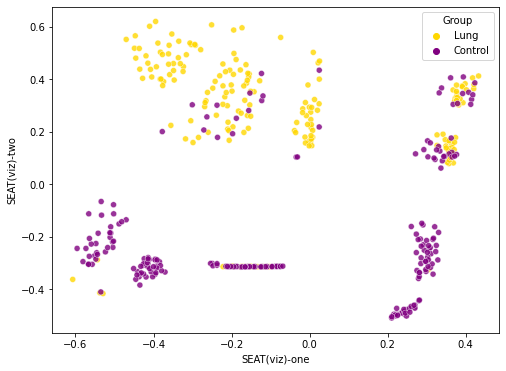

In [6]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([lc_df,ctrl_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1.0,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=100, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/lung_cancer.feat7.png',dpi=300)

C:\Users\jqluo6\Anaconda3\lib\site-packages\pyseat\SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=3468127.5	loss_1=4504247.0	loss_2=4555325.0	loss=12527700.0	update_loss=12527700.0	
epoch=100	loss_0=470875.625	loss_1=750390.25	loss_2=767838.875	loss=1989104.75	update_loss=1989104.75	
epoch=199	loss_0=278927.875	loss_1=482098.71875	loss_2=495098.28125	loss=1256124.875	update_loss=1256124.875	


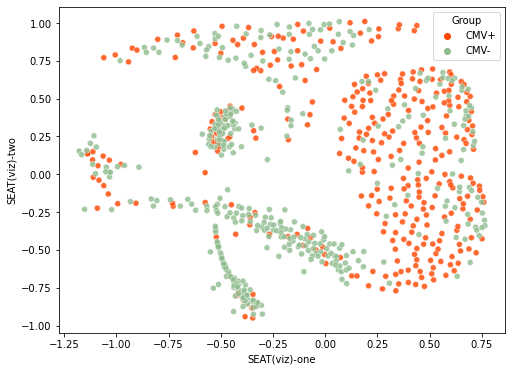

In [7]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([cmvp_df,cmvn_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=10,n_neighbors=15,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=200, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/CMV_pos_vs_neg.feat7.png',dpi=300)

spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765


C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


epoch=0	loss_0=8959727.0	loss_1=14956986.0	loss_2=24388690.0	loss=48305400.0	update_loss=48305400.0	
epoch=99	loss_0=402430.71875	loss_1=1574030.5	loss_2=4486348.0	loss=6462809.0	update_loss=6462809.0	


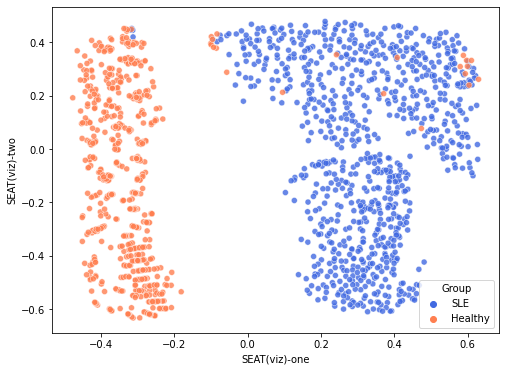

In [8]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([sle_df,healthy_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1.0,n_neighbors=5,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=100, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/SLE_vs_healthy.feat7.png',dpi=300)

C:\Users\jqluo6\Anaconda3\lib\site-packages\pyseat\SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=106527.0234375	loss_1=550222.125	loss_2=578172.8125	loss=1234922.0	update_loss=1234922.0	
epoch=100	loss_0=17168.02734375	loss_1=76783.25	loss_2=80847.3125	loss=174798.59375	update_loss=174798.59375	
epoch=200	loss_0=29260.99609375	loss_1=45803.9375	loss_2=47749.21875	loss=122814.15625	update_loss=122814.15625	
epoch=300	loss_0=37487.3203125	loss_1=36325.8046875	loss_2=37319.7734375	loss=111132.8984375	update_loss=111132.8984375	
epoch=399	loss_0=42387.6953125	loss_1=32420.375	loss_2=32811.03125	loss=107619.1015625	update_loss=107619.1015625	


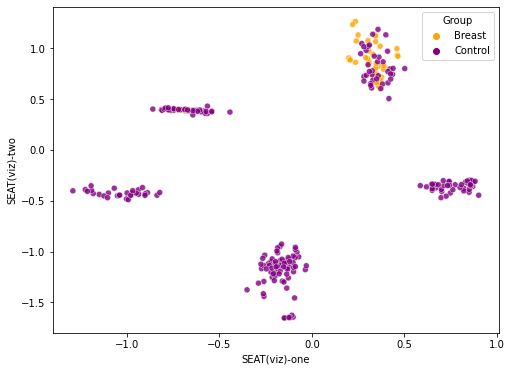

In [9]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([bc_df,ctrl_df])
seat = SEAT(affinity="cosine_similarity",n_neighbors=20,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=400, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/breast_cancer.feat7.png',dpi=300)

C:\Users\jqluo6\Anaconda3\lib\site-packages\pyseat\SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=228100.9375	loss_1=684803.5	loss_2=755453.125	loss=1668357.5	update_loss=1668357.5	
epoch=49	loss_0=30553.734375	loss_1=144475.0	loss_2=171800.734375	loss=346829.46875	update_loss=346829.46875	


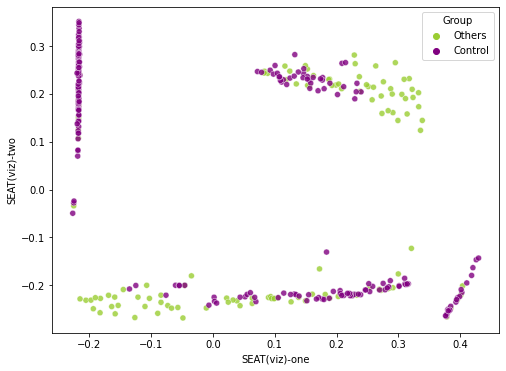

In [10]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([cancer_df,ctrl_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1,n_neighbors=25,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=50, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/other_cancer.feat7.png',dpi=300)

C:\Users\jqluo6\Anaconda3\lib\site-packages\pyseat\SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=137874.34375	loss_1=579026.125	loss_2=692503.5	loss=1409404.0	update_loss=1409404.0	
epoch=100	loss_0=11717.6044921875	loss_1=81110.203125	loss_2=106944.6171875	loss=199772.421875	update_loss=199772.421875	
epoch=199	loss_0=16973.162109375	loss_1=55301.53515625	loss_2=73383.75	loss=145658.4375	update_loss=145658.4375	


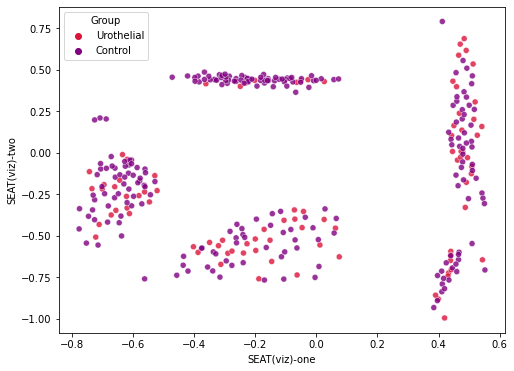

In [11]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([uc_df,ctrl_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1,n_neighbors=20,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=200, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/urothelial_cancer.feat7.png',dpi=300)

spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=2092948.625	loss_1=5492795.0	loss_2=6584333.0	loss=14170076.0	update_loss=14170076.0	


C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


epoch=100	loss_0=144044.546875	loss_1=727179.0625	loss_2=1031917.5	loss=1903141.125	update_loss=1903141.125	
epoch=199	loss_0=129941.484375	loss_1=475293.25	loss_2=703392.5625	loss=1308627.25	update_loss=1308627.25	


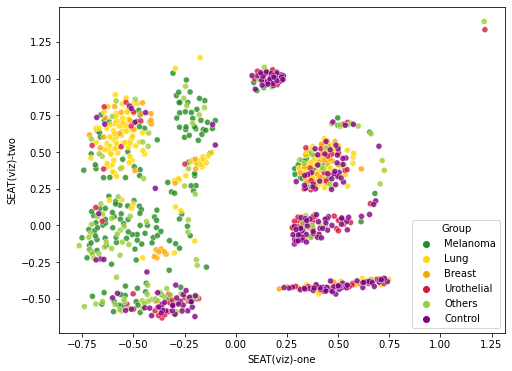

In [12]:
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([mela_df,lc_df,bc_df,uc_df,cancer_df,ctrl_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1,n_neighbors=15,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [1]*len(df),'Subpopulation': seat.labels_,'Club': seat.clubs})
HE = HierachicalEmbedding(device='cpu', n_epochs=200, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1,1,1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.savefig('seat_plots/all_cancers_vs_ctrl.feat7.png',dpi=300)

spread = 1, min_dist = 0.1, a = 1.5769434603935901, b = 0.8950608781603765
epoch=0	loss_0=6308028.0	loss=6308028.0	update_loss=6308028.0	


C:\Users\jqluo6\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


epoch=100	loss_0=895319.625	loss=895319.625	update_loss=895319.625	
epoch=200	loss_0=546038.9375	loss=546038.9375	update_loss=546038.9375	
epoch=300	loss_0=400653.5	loss=400653.5	update_loss=400653.5	
epoch=400	loss_0=319978.3125	loss=319978.3125	update_loss=319978.3125	
epoch=499	loss_0=268575.78125	loss=268575.78125	update_loss=268575.78125	


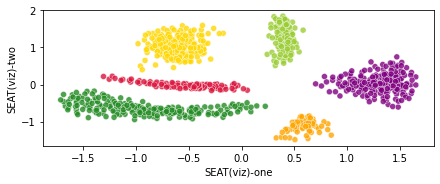

In [13]:
# supervised SEAT
feat7=['SARS-CoV2','CMV','Influenza','EBV','HBV','Med','High']
my_pal = {"Control": 'purple', "Urothelial": "crimson", "Breast":"orange", "Lung": "gold", "Others":"yellowgreen", "Melanoma":"forestgreen","CMV+":"orangered","CMV-":"darkseagreen","SLE":"royalblue","Healthy":"coral"}
df = pd.concat([mela_df,lc_df,bc_df,uc_df,cancer_df,ctrl_df])
seat = SEAT(affinity="laplacian_kernel",kernel_gamma=1,n_neighbors=10,sparsification="knn_neighbors",objective="SE",strategy="bottom_up",
            verbose=False)
seat.fit_predict(df[feat7].values)
y = pd.DataFrame({'Global': [5]*len(mela_df)+[4]*len(lc_df)+[3]*len(bc_df)+[2]*len(uc_df)+[1]*len(cancer_df)+[0]*len(ctrl_df)})
HE = HierachicalEmbedding(device='cpu', n_epochs=500, init='spectral', random_state=0,min_dist=0.1,n_components=2)
HE_result = HE.fit_transform(seat.aff_m, y, thetas=[1])
df['SEAT(viz)-one'] = HE_result[:,0]
df['SEAT(viz)-two'] = HE_result[:,1]
plt.figure(figsize=(7,2.5))
sns.scatterplot(x="SEAT(viz)-one", y="SEAT(viz)-two", hue="Group", palette=my_pal,data=df,legend="full",alpha=0.8)
plt.legend('', frameon=False)
plt.savefig('seat_plots/all_cancers_vs_ctrl_supervised.feat7.png',dpi=300)